# Encapsulación y modularización

# 1. Crear el proyecto

- Crea una carpeta
- Navega desde la terminal hasta la carpeta

In [1]:
"""
* code . -> para abrir en ese mismo sitio
conf: ctrl + shift + p 
install code in path
"""

'\n* code . -> para abrir en ese mismo sitio\nconf: ctrl + shift + p \ninstall code in path\n'

# 2. Crear el entorno

- Desde la terminal, crea un entorno

```bash
ENTORNO="data"
conda deactivate
conda env remove -y --name $ENTORNO
conda create -y -n $ENTORNO python=3.13
conda activate $ENTORNO
conda install -y -n $ENTORNO ipykernel
python -m ipykernel install --user --name=$ENTORNO
conda activate $ENTORNO
````

# 3. EDA: exploratory data analysis

- Entender qué datos tengo
- Transformar o limpiar lo que necesite
- Visualizar lo que necesite

In [4]:
# hacer cosas
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
df.isna().sum().values.sum()

np.int64(869)

In [6]:
# Contexto

df.dtypes

df.columns
df.shape

df.head()
df.info()
df.describe()


df.isna().sum() # nulos
df.duplicated # duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<bound method DataFrame.duplicated of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  a

In [7]:
df["age_group"] = pd.cut(df["age"],
                        bins=[0, 12, 18, 35, 60, 100],
                        labels=["Kid", "Teenager", "otra cosa", "otra más", "el último"])

In [8]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
447,1,1,male,34.0,0,0,26.55,S,First,man,True,NaN,Southampton,yes,True,otra cosa


In [9]:
df["sex_num"] = df["sex"].map({"male": 0, "female":1})

In [10]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,sex_num
353,0,3,male,25.0,1,0,17.8,S,Third,man,True,NaN,Southampton,no,False,otra cosa,0


In [11]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,sex_num
494,0,3,male,21.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True,otra cosa,0


In [12]:
df.drop(["deck",	"embark_town"], axis=1, inplace=True)

In [13]:
df.shape[0]

891

In [14]:
df["age"].isna().sum()

np.int64(177)

In [15]:
df["age"].mean()

np.float64(29.69911764705882)

In [16]:
df["age"].median()

np.float64(28.0)

In [17]:
df["age_new"] = df["age"].fillna(df["age"].mean())

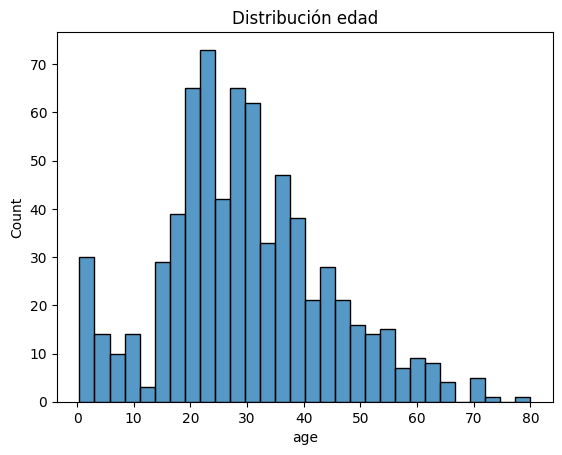

In [18]:
sns.histplot(df["age"], bins=30)
plt.title("Distribución edad");

In [19]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone,age_group,sex_num,age_new
747,1,2,female,30.0,0,0,13.0,S,Second,woman,False,yes,True,otra cosa,1,30.0


In [20]:
def plot_class_age (df):
    sns.boxplot(x="pclass", y="age", data=df)
    plt.title("Clase según edad")
    plt.savefig("edadyclase.png")

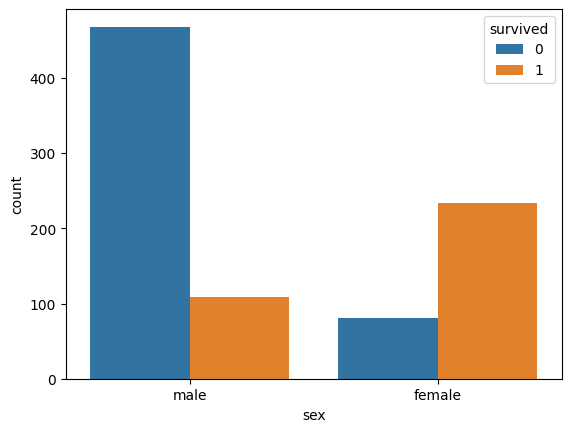

In [21]:
sns.countplot(x="sex", hue="survived", data=df);
# hue, tono

# 4. ENCAPSULAR: de líneas a funciones

- Agrupar las celdas y líneas de código que necesite bajo funciones que tengan sentido
- Asegurarme que los argumentos y los return tiene sentido

In [ ]:
# def: exploracion ✅
# def: transformaciones ✅
# def: visualizar

In [25]:
def describir_dataset (df):
    print(f"Este df tiene estas columnas y filas: {df.shape}")
    print(df.isna().sum())

describir_dataset (df)

Este df tiene estas columnas y filas: (891, 16)
survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alive           0
alone           0
age_group     177
sex_num         0
age_new         0
dtype: int64


In [ ]:
def transformar_edad_sexo (df):
    df["age_group"] = pd.cut(df["age"],
                            bins=[0, 12, 18, 35, 60, 100],
                            labels=["Kid", "Teenager", "otra cosa", "otra más", "el último"])
    df["sex_num"] = df["sex"].map({"male": 0, "female":1})

    return df

def limpieza_df (df):
    df.drop(["deck",	"embark_town"], axis=1, inplace=True)
    return df

def fill_na_age (df):
    df["age_new"] = df["age"].fillna(df["age"].mean())
    return df


#limpieza_df (df)
#transformar_edad_sexo (df)
#fill_na_age (df)

In [ ]:
def histograma_edad (df):
    sns.histplot(df["age"], bins=30)
    plt.title("Distribución edad"); # se cierra el plt;

histograma_edad (df)

In [ ]:
def survival_plot (df):
    sns.countplot(x="sex", hue="survived", data=df)
    plt.savefig("survival.png")

In [38]:
# Todas las funciones son estas:

def transformar_edad_sexo (df):
    df["age_group"] = pd.cut(df["age"],
                            bins=[0, 12, 18, 35, 60, 100],
                            labels=["Kid", "Teenager", "otra cosa", "otra más", "el último"])
    df["sex_num"] = df["sex"].map({"male": 0, "female":1})

    return df

def limpieza_df (df):
    df.drop(["deck",	"embark_town"], axis=1, inplace=True)
    return df

def fill_na_age (df):
    df["age_new"] = df["age"].fillna(df["age"].mean())
    return df

def histograma_edad (df):
    sns.histplot(df["age"], bins=30)
    plt.title("Distribución edad"); # se cierra el plt;

def survival_plot (df):
    sns.countplot(x="sex", hue="survived", data=df)
    plt.savefig("survival.png")

# 5. ESTRUCTURA

- Generar la estructura estándar

In [ ]:
"""
notebook.ipynb
README.md
main.py
data/
images/
src/
    exploration.py
    transformation.py
    visualization.py
"""

'\nmain.py\nsrc/\n    exploration.py\n    transformation.py\n    visualization.py\nREADME.md\ndata\nimages\n'

# 6. Llevarnos las funciones a los archivos que correspondan: separar definiciones de invocaciones

- Repartir estas funciones en los archivos de python correspondientes

In [ ]:
# Todas las funciones son estas:

# src/exploration.py
def describir_dataset (df):
    print(f"Este df tiene estas columnas y filas: {df.shape}")
    print(df.isna().sum())

# src/exploration.py
def transformar_edad_sexo (df):
    df["age_group"] = pd.cut(df["age"],
                            bins=[0, 12, 18, 35, 60, 100],
                            labels=["Kid", "Teenager", "otra cosa", "otra más", "el último"])
    df["sex_num"] = df["sex"].map({"male": 0, "female":1})

    return df

def limpieza_df (df):
    df.drop(["deck",	"embark_town"], axis=1, inplace=True)
    return df

def fill_na_age (df):
    df["age_new"] = df["age"].fillna(df["age"].mean())
    return df


# src/visualization.py
def histograma_edad (df):
    sns.histplot(df["age"], bins=30)
    plt.title("Distribución edad"); # se cierra el plt;

def survival_plot (df):
    sns.countplot(x="sex", hue="survived", data=df)
    plt.savefig("survival.png")

# 7. IMPORTAR nuestro propio código definido para ejecutarlo: notebook

- Junta en una celda: los import y las invocaciones de las funciones para poder ejecutar de principio a fin todo tu proceso
- Tendrás que tener en cuenta qué recibe y qué devuelve cada función que invoques

Este df tiene estas columnas y filas: (891, 15)
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


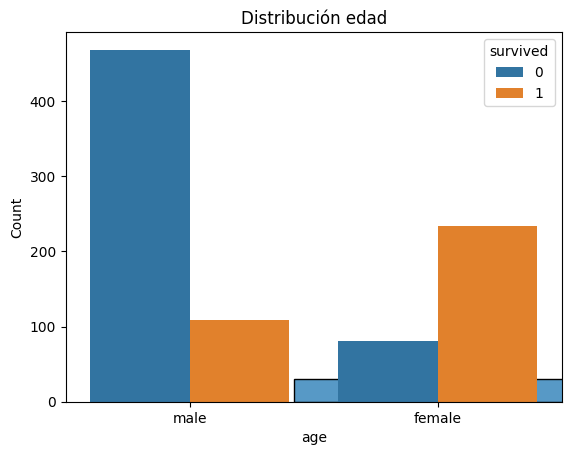

In [12]:
# import
# invocaciones

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import src.exploration as exp
import src.transformation as trs
import src.visualization as viz

df = sns.load_dataset("titanic")
exp.describir_dataset (df)

df_1 = trs.transformar_edad_sexo (df)
df_2 = trs.limpieza_df (df_1)
df_3 = trs.fill_na_age (df_2)

viz.histograma_edad (df_3)
viz.survival_plot (df_3)

df_3.to_csv("mi_primerito_pipeline.csv", index=False)

In [16]:
import os
os.system("mi_primerito_pipeline.csv")
os.system("rm survival.png")

sh: mi_primerito_pipeline.csv: command not found
rm: survival.png: No such file or directory


256

- En el `main.py`, copia y pega el código que definiste en la celda anterior
- Puedes incluir un: `if __name__ == "__main__":` entre los import y las invocaciones. Es algo que te 
garantiza la ejecución del código de forma controlada. https://realpython.com/if-name-main-python/
- En la carpeta `src`, incluye un archivo que sea: `__init__.py ` y que esté vacío. Esto nos permitirá que Python sepa que es un módulo.

# 9. Eejcutar: python `main.py`

- Desde la terminal, activa el entorno y ejecuta el archivo prinicipal

# 10. Generar requirements.txt y el .yml